In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<img src="input/kmeans.png">

## Importación de datos

In [114]:
data = pd.read_csv('datos limpios')
data.head()

,Unnamed: 0,DBO5,DEPURADORA,MONTH,NT,PRUEBA,PT,SS,YEAR,DEPURADORA_2,MONTH_2,DATE
0,0,5.0,VIV,enero,15.8,1.0,0.91,5.0,2017.0,0,1,2017-1-1
1,1,5.0,VIV,enero,14.9,2.0,0.84,4.0,2017.0,0,1,2017-1-2
2,2,5.0,VIV,febrero,9.8,1.0,0.63,3.0,2017.0,0,2,2017-2-1
3,3,5.0,VIV,febrero,7.0,2.0,0.67,3.0,2017.0,0,2,2017-2-2
4,4,5.0,VIV,marzo,9.7,1.0,0.85,4.0,2017.0,0,3,2017-3-1


# Tratando los datos para K-means

Todos los datos deben ser numéricos,por lo tanto eliminaremos las columnas categóricas,En principio los datos que vamos a usar para hacer el unsupervise e intentar clusterizar,no haría falta normalizarlos ni standarizarlos,puesto que todos tienen las mismas unidades de concentración (mg/L),por lo tanto estarian "balanceados".

In [115]:
data_2=data.drop(columns=['PRUEBA','Unnamed: 0', 'YEAR', 'DEPURADORA','MONTH_2','DATE','MONTH'], axis=1)
data_2.head()

,DBO5,NT,PT,SS,DEPURADORA_2
0,5.0,15.8,0.91,5.0,0
1,5.0,14.9,0.84,4.0,0
2,5.0,9.8,0.63,3.0,0
3,5.0,7.0,0.67,3.0,0
4,5.0,9.7,0.85,4.0,0


In [116]:
data_3=data_2.drop(columns=['DEPURADORA_2'])
data_3.head()

,DBO5,NT,PT,SS
0,5.0,15.8,0.91,5.0
1,5.0,14.9,0.84,4.0
2,5.0,9.8,0.63,3.0
3,5.0,7.0,0.67,3.0
4,5.0,9.7,0.85,4.0


## Búsqueda de la cantidad optima de clusters

In [117]:
wcss=[]
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(data_3)
    wcss.append(kmeans.inertia_)

Lo que nos interesa a la hora de crear cluster,es que la distancia entre los individuos dentro de un cluster sea lo más similar posible,por lo tanto más se parecerán los individuos entre si,y mas definido estarán los cluster entre ellos.
Para medir esta distancia,se usa la suma de los cudrados dentro de cada grupo(wcss).

<function matplotlib.pyplot.show(close=None, block=None)>

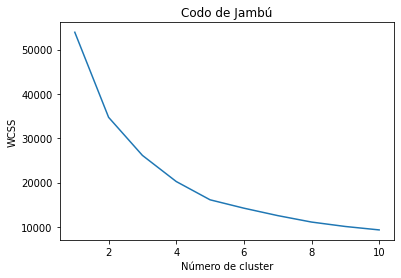

In [118]:
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de cluster")
plt.ylabel("WCSS")
plt.show

Al analizar el gráfico anterior podemos observar una descenso de una pendiente pronunciada,en el caso del número de cluster igual a 5,a partir de entonces la gráfica tendrá menor pendiente.

Se repite el ensayo y subiendo el número de iteraciones,a ver si esto nos pudiera modificar el número de cluster.

In [119]:
wcss=[]
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, max_iter=500)
    kmeans.fit(data_3)
    wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

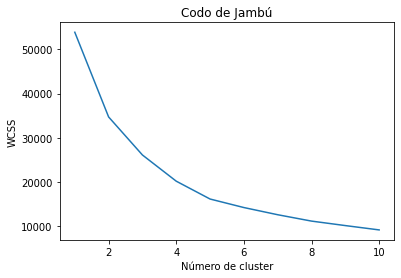

In [120]:
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de cluster")
plt.ylabel("WCSS")
plt.show

Se comprueba que aunque se varie el número de iteraciones se mantiene como número optimizado de cluster 5.

## Kmeans a los datos

Se añade la columna cluster generada por el metodo kmeans al dataset previo,donde se encuentran las depuradoras.

In [121]:
clustering=KMeans(n_clusters=5, max_iter=300)
clustering.fit(data_3)

KMeans(n_clusters=5)

In [122]:
data_2['KMeans_Cluster']=clustering.labels_
data_2.head()

,DBO5,NT,PT,SS,DEPURADORA_2,KMeans_Cluster
0,5.0,15.8,0.91,5.0,0,2
1,5.0,14.9,0.84,4.0,0,2
2,5.0,9.8,0.63,3.0,0,2
3,5.0,7.0,0.67,3.0,0,2
4,5.0,9.7,0.85,4.0,0,2


En las siguientes agrupaciones en función de los cluster,se calcula la media de los diatintos contaminantes,y en algunas de ellas estos son muy parecidos,pudiendo quizás llevar a confusión en valores de distintos grupos.Esto ocurre sobre todo en el caso del NT, entre los clusters 2 y 4.y Con el PT y los SS con los grupos 0 y 4,esto nos llevaría a pensar que el grupo 4 no esta muy definido,y comprarte "caracteristicas" de varios cluster.

In [123]:
data_2.groupby(['KMeans_Cluster'])['NT'].mean() 

KMeans_Cluster
0    10.220982
1    43.054545
2     9.377546
3    11.788016
4    10.004273
Name: NT, dtype: float64

In [124]:
data_2.groupby(['KMeans_Cluster'])['PT'].mean() 

KMeans_Cluster
0    0.797273
1    0.535000
2    0.588076
3    0.593408
4    0.694267
Name: PT, dtype: float64

In [125]:
data_2.groupby(['KMeans_Cluster'])['SS'].mean() 

KMeans_Cluster
0    36.545455
1     3.750000
2     3.827336
3    11.404739
4    14.561905
Name: SS, dtype: float64

In [126]:
data_2.groupby(['KMeans_Cluster'])['DBO5'].mean() 

KMeans_Cluster
0    15.909091
1     5.625000
2     4.993080
3     7.109005
4    14.531429
Name: DBO5, dtype: float64

Se compara la columna previa que habia de clasificacion de depuradoras con la de los cluster predichos por el modelo.

In [24]:
data_4=data_2.drop(columns=['DBO5','NT', 'PT', 'SS'])
data_4.head()

,DEPURADORA_2,KMeans_Cluster
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## PCA para reducir dimensiones y representación cluster

In [127]:
pca=PCA(n_components=2)
pca_data_3=pca.fit_transform(data_2)
pca_data_3_df=pd.DataFrame(data=pca_data_3,columns= ['Componente_1', 'Componente_2'])
pca_depuradoras=pd.concat([pca_data_3_df,data_2[['KMeans_Cluster']]], axis=1)

In [128]:
pca_depuradoras

,Componente_1,Componente_2,KMeans_Cluster
0,-4.446302,5.127370,2
1,-5.340767,4.190128,2
2,-6.305766,-0.912613,2
3,-6.351709,-3.690367,2
4,-5.426610,-0.968193,2
...,...,...,...
619,0.354375,-1.631787,3
620,5.546561,-2.645240,4
621,10.821710,-2.376763,4
622,4.195276,-2.575462,4


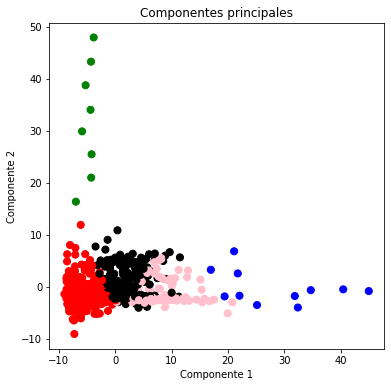

In [129]:
fig=plt.figure(figsize= (6,6))

ax =fig.add_subplot(1, 1, 1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title('Componentes principales')

color_theme=np.array(["blue", "green", "red", "black", "pink"])
ax.scatter(x=pca_depuradoras.Componente_1, y=pca_depuradoras.Componente_2,
          c=color_theme[pca_depuradoras.KMeans_Cluster],s=50)
plt.show()

Como se observa en el gráfico hay un cluster que comparte características con otros 2clusters,en este caso el número 4,como vimos anteriormente,tenía valores muy parecidos al cluster 0 y 2 sin poder llegar a diferenciarse bien.

In [28]:
data_4.to_csv('kmeans_cluster')